In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [33]:
from fastai import *
from fastai.vision import *
from fastai.basic_data import *

In [12]:
from IPython.core.debugger import set_trace

In [3]:
path = 'data/dogbr/'

In [18]:
# !kaggle competitions download -c dog-breed-identification -p {path}

  0%|                                                | 0.00/214k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 214k/214k [00:00<00:00, 75.2MB/s]
  0%|                                                | 0.00/281k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 281k/281k [00:00<00:00, 102MB/s]
 90%|█████████████████████████████████████    | 313M/346M [00:01<00:00, 328MB/s]
100%|█████████████████████████████████████████| 346M/346M [00:01<00:00, 325MB/s]
 96%|███████████████████████████████████████▎ | 330M/345M [00:01<00:00, 325MB/s]
100%|█████████████████████████████████████████| 345M/345M [00:01<00:00, 310MB/s]


In [4]:
!ls {path}

labels.csv	sample_submission.csv	   test      train
labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


In [5]:
raw_labels = pd.read_csv(f'{path}labels.csv')
raw_labels.tail()

,id,breed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever


In [6]:
type(raw_labels)

pandas.core.frame.DataFrame

## Create DataLoaders

In [20]:
sz = 64

In [7]:
tfms = get_transforms()

In [29]:
data = ImageItemList.from_df(raw_labels, path, folder='train', suffix='.jpg')

data = data.random_split_by_pct()

data = data.label_from_df()

data = data.add_test_folder()

data = data.transform(tfms, size=sz)

In [30]:
data = data.databunch()

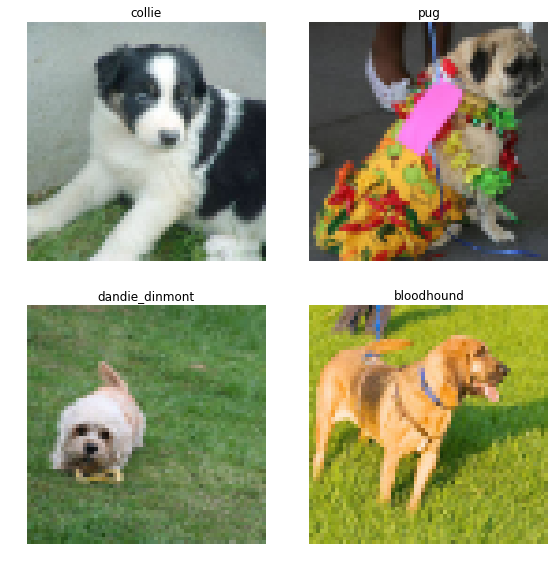

In [35]:
data.show_batch(2, size=6)

In [39]:
len(data.classes)

120

## Training

In [ ]:
learner = create_cnn(data, models.resnet50, metrics=)